In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
movies =pd.read_csv(r"D:\Excel R\Data Science Assignments\Association Rules\my_movies.csv")

In [4]:
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [5]:
movies.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'Sixth Sense', 'Gladiator', 'LOTR1',
       'Harry Potter1', 'Patriot', 'LOTR2', 'Harry Potter2', 'LOTR',
       'Braveheart', 'Green Mile'],
      dtype='object')

# Business Moments

In [6]:
movies.std()

Sixth Sense      0.516398
Gladiator        0.483046
LOTR1            0.421637
Harry Potter1    0.421637
Patriot          0.516398
LOTR2            0.421637
Harry Potter2    0.316228
LOTR             0.316228
Braveheart       0.316228
Green Mile       0.421637
dtype: float64

In [7]:
movies.var()

Sixth Sense      0.266667
Gladiator        0.233333
LOTR1            0.177778
Harry Potter1    0.177778
Patriot          0.266667
LOTR2            0.177778
Harry Potter2    0.100000
LOTR             0.100000
Braveheart       0.100000
Green Mile       0.177778
dtype: float64

In [8]:
movies.kurtosis()

Sixth Sense      -2.276786
Gladiator        -1.224490
LOTR1             1.406250
Harry Potter1     1.406250
Patriot          -2.276786
LOTR2             1.406250
Harry Potter2    10.000000
LOTR             10.000000
Braveheart       10.000000
Green Mile        1.406250
dtype: float64

In [9]:
movies.skew()

Sixth Sense     -0.484123
Gladiator       -1.035098
LOTR1            1.778781
Harry Potter1    1.778781
Patriot         -0.484123
LOTR2            1.778781
Harry Potter2    3.162278
LOTR             3.162278
Braveheart       3.162278
Green Mile       1.778781
dtype: float64

Data PreProcessing

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [11]:
movies.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
movies.shape

(10, 10)

In [48]:
movies.columns

Index(['Sixth Sense', 'Gladiator', 'LOTR1', 'Harry Potter1', 'Patriot',
       'LOTR2', 'Harry Potter2', 'LOTR', 'Braveheart', 'Green Mile'],
      dtype='object')

In [49]:
movies.isnull().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

Since there are no Missing values in the data set  we  are processding forward

In [12]:
pd.get_dummies(movies['V1'])

,Gladiator,Harry Potter1,LOTR1,Sixth Sense
0,0,0,0,1
1,1,0,0,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
6,0,1,0,0
7,1,0,0,0
8,1,0,0,0
9,0,0,0,1


In [13]:
new_df =pd.DataFrame()

In [14]:
new_df =  movies.drop("V1",axis =1,inplace=True)
new_df =  movies.drop("V2",axis =1,inplace=True)
new_df =  movies.drop("V4",axis =1,inplace=True)
new_df =  movies.drop("V5",axis =1,inplace=True)
new_df =  movies.drop("V3",axis =1,inplace=True)

In [15]:
new_df =pd.DataFrame(movies)

In [16]:
new_df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


# Appplying the Assocation Rules


In [18]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [51]:
freqient_items =apriori(new_df,min_support =0.4,use_colnames=True)
freqient_items

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Sixth Sense, Gladiator)"
4,0.4,"(Sixth Sense, Patriot)"
5,0.6,"(Patriot, Gladiator)"
6,0.4,"(Sixth Sense, Patriot, Gladiator)"


Creation of Rules using Frequent itme sets selecting the diffrent diffrent metric ==> lift and confidence

In [70]:
generating_rules =association_rules(freqient_items,metric="confidence", min_threshold=0.70)
generating_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
5,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0


In [71]:
generating_rules_lift =association_rules(freqient_items,metric="lift",min_threshold = 1.3)
generating_rules_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
3,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
4,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
5,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4


From the above we metric values with confidence =0.8 and lift =1.2.
according  to those metric values the most selling moies are
Patriot , Gladiator, SixthSense, and 

# Chainging the values of the metric and comparing the basket analysis

In [73]:
fre_item =apriori(new_df,min_support=0.5,use_colnames=True)
fre_item

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Sixth Sense, Gladiator)"
4,0.6,"(Patriot, Gladiator)"


We got new fre_item  so we  are forming new association rules using new confidence and lift values

In [83]:
rules1 =association_rules(fre_item,metric="confidence",min_threshold = 0.85)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8


In [75]:
rules2 =association_rules(fre_item,metric ="lift",min_threshold=1.4)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8


In [76]:
# From the above intuation we change the min_support value to 0.5 but the min value of min_support value is 0.4
# and created new association rules with metric "confidence" with min_threshold value is 0.80
# and again change the metric confidence to "lift " with the value 1 to 1.4
# from this we can understand if a customer buys Patroit then he is going to buy Gladiator with confidence of 80%

Visualizations of  Association rules

In [84]:
x1=rules1['confidence'].values
y1=rules1['lift'].values

In [78]:
x= generating_rules['confidence'].values
y =generating_rules_lift['lift'].values

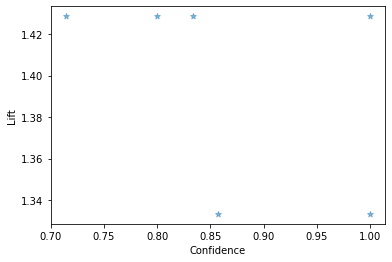

In [82]:
#Confidence Vs lift Metric
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x,y,alpha=0.5,marker ="*")
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.show()

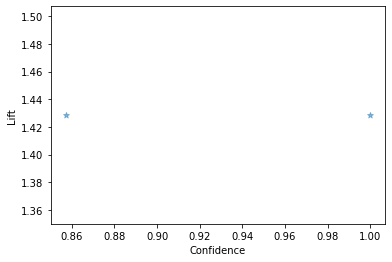

In [85]:
#support Vs Confidence
%matplotlib inline
plt.scatter(x1,y1,alpha=0.5,marker ="*")
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.show()

# Count Plot

<AxesSubplot:ylabel='count'>

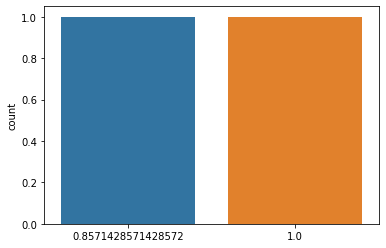

In [86]:
sns.countplot(x=x1,data=rules1)

<AxesSubplot:xlabel='count'>

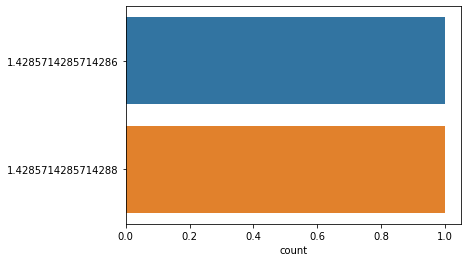

In [88]:
sns.countplot(y=y1,data=rules1)

<AxesSubplot:>

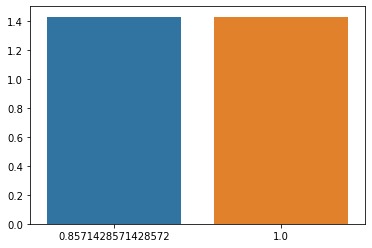

In [89]:
sns.barplot(x=x1,y=y1,data=rules1)

<AxesSubplot:>

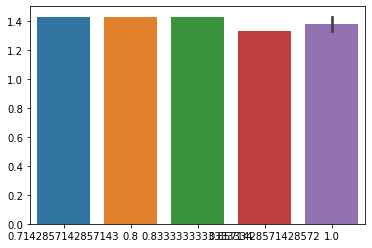

In [90]:
sns.barplot(x=x,y=y,data=generating_rules)